In [1]:
# First, let's load the provided dataset and take a preliminary look at its structure.
import pandas as pd

# Load the dataset
file_path = '/content/Social_Network_Ads.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [2]:
# Let's proceed with the data preprocessing step

# Check for missing values in the dataset
missing_values = data.isnull().sum()

# Standardize the feature variables (Age and EstimatedSalary)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
features = ['Age', 'EstimatedSalary']
data[features] = scaler.fit_transform(data[features])

# Display the count of missing values for each column and the first few rows of the standardized data
missing_values, data.head()

(Age                0
 EstimatedSalary    0
 Purchased          0
 dtype: int64,
         Age  EstimatedSalary  Purchased
 0 -1.781797        -1.490046          0
 1 -0.253587        -1.460681          0
 2 -1.113206        -0.785290          0
 3 -1.017692        -0.374182          0
 4 -1.781797         0.183751          0)

In [3]:
from sklearn.manifold import LocallyLinearEmbedding
import numpy as np

# Select features for LLE
features = data[['Age', 'EstimatedSalary']]

# Setting up LLE
# Given limited compute resources, we'll start with a smaller number of neighbors
n_neighbors = 10  # Number of neighbors for LLE
n_components = 2  # Number of dimensions we want to reduce our data to

lle = LocallyLinearEmbedding(n_neighbors=n_neighbors, n_components=n_components)

# Applying LLE
reduced_data = lle.fit_transform(features)

# Converting the reduced data into a DataFrame for easier analysis and visualization
reduced_df = pd.DataFrame(reduced_data, columns=['Component_1', 'Component_2'])

# Display the first few rows of the reduced data
reduced_df.head()

,Component_1,Component_2
0,0.101461,0.016854
1,0.046076,0.064763
2,0.061950,0.004241
3,0.049513,-0.012537
4,0.066306,-0.065364


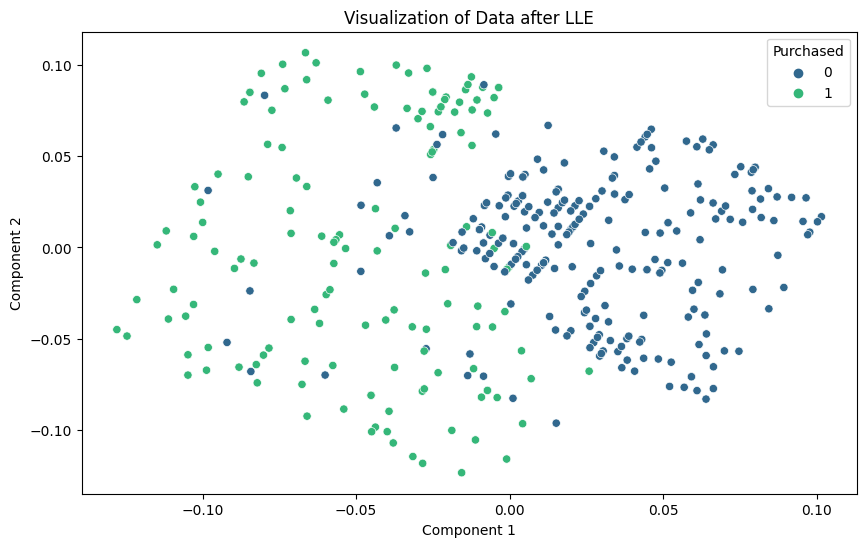

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualization of the reduced data
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Component_1', y='Component_2', hue=data['Purchased'], palette='viridis', data=reduced_df)
plt.title('Visualization of Data after LLE')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend(title='Purchased')
plt.show()